In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/home/sonia/Bureau/ransomware_detection/personalizedCleanedRansomwareDetection.csv')

X = df.drop('Family', axis=1)
y = df.Family
#print(y)

np.random.seed(3)

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier,XGBRFClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

models = []

models.append(('MLP', Perceptron()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('BGC', BaggingClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('XGBC', XGBClassifier()))
models.append(('XGBRFC', XGBClassifier()))


maxim = 0
best_model = []

for name, clf in models:
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    print('%s: %f' % (name, accuracy))
    if(accuracy > maxim):
        maxim = accuracy
        best_model.append((name, clf))

print('the best model with the train_test_split :', best_model[-1][0])
# Selection des algos
model = best_model[-1][1]
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# evaluation des algos
maxim = 0
results = []
names = []
best_model = []

for name, model in models:
    kfold = StratifiedShuffleSplit(n_splits=7, test_size=0.27, random_state=3)
    cv_results = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    me = cv_results.mean()
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    if(me > maxim):
        maxim = me
        best_model.append((name, model))
"""
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()
"""
print('Best model given the best accuracy is: '+best_model[-1][0])
# Selection des algos
model = best_model[-1][1]
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

MLP: 0.133333
RFC: 0.866667
CART: 0.733333
BGC: 0.866667
ABC: 0.400000
XGBC: 0.800000
XGBRFC: 0.800000
the best model with the train_test_split : RFC
0.8666666666666667
[[1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

  Cryptowall       1.00      1.00      1.00         1
  Megacortex       1.00      1.00      1.00         1
        Ryuk       0.33      1.00      0.50         1
      Samsam       1.00      1.00      1.00         1
     bitcoin       1.00      1.00      1.00         1
      cerber       0.00      0.00      0.00         2
 cryptojoker       1.00      1.00      1.00         1
      crysis       1.00      1.00      1.00         3
      dharma       

/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP: 0.243697 (0.079721)
RFC: 0.714286 (0.049000)
CART: 0.638655 (0.066168)
BGC: 0.655462 (0.073259)
ABC: 0.369748 (0.041168)
XGBC: 0.680672 (0.053148)
XGBRFC: 0.680672 (0.053148)
Best model given the best accuracy is: RFC
0.8666666666666667
[[1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

  Cryptowall       1.00      1.00      1.00         1
  Megacortex       1.00      1.00      1.00         1
        Ryuk       0.50      1.00      0.67         1
      Samsam       0.50      1.00      0.67         1
     bitcoin       1.00      1.00      1.00         1
      cerber       1.00      0.50      0.67         2
 cryptojoker       0.00      0.00      0.00         1


/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
model = RandomForestClassifier()
from pprint import pprint

np.random.seed(3)

print('Parameters in use:\n')
pprint(model.get_params())

param_dist = {
    'max_depth': [1, 10, 11, 20, 100],
    'max_features': ['auto', None],
    'min_samples_leaf': [ 1, 2, 3, 4],
    'min_samples_split': [1, 2, 3, 4],
    'n_estimators': [100, 200, 350, 450, 500],
    'n_jobs': [-1],
    'oob_score': [True],
    'verbose': [1]
}

from sklearn.model_selection import StratifiedKFold, GridSearchCV
skf = StratifiedKFold(n_splits=3, shuffle = True)
#clf = GridSearchCV(estimator=XGBClassifier(), param_grid=param_dist, scoring='accuracy', n_jobs=-1, pre_dispatch= None, cv=cv.split(X_train,y_train), refit=True)
clf = GridSearchCV(RandomForestClassifier(), param_dist, n_jobs=-1, cv=skf.split(X_train,y_train), refit=True)


clf.fit(X_train, y_train)

print("Best estimator is: {}".format(clf.best_estimator_))
print("Best parameters are: {}".format(clf.best_params_))
print("Best score is: {}".format(clf.best_score_))

pred = clf.best_estimator_.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test, pred))

Parameters in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s


Best estimator is: RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       oob_score=True, verbose=1)
Best parameters are: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': True, 'verbose': 1}
Best score is: 0.6444444444444445
0.8666666666666667
              precision    recall  f1-score   support

  Cryptowall       1.00      1.00      1.00         1
  Megacortex       1.00      1.00      1.00         1
        Ryuk       0.50      1.00      0.67         1
      Samsam       0.50      1.00      0.67         1
     bitcoin       1.00      1.00      1.00         1
      cerber       1.00      0.50      0.67         2
 cryptojoker       0.00      0.00      0.00         1
      crysis       1.00      1.00      1.00         3
      dharma       1.00      1.00      1.00         1
       locky       1.00      1.00      1.00         1
        raas       1.00      1.00      

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


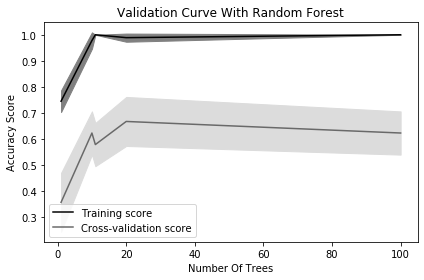

In [3]:
from sklearn.model_selection import validation_curve, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

param_range=[1, 10, 11, 20, 100]# 150, 200, 250, 300, 350, 400]
#param_range=np.linspace(1, 1000, 1, endpoint=True)

train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = y_train, param_name = 'n_estimators', param_range = param_range, cv = 3, scoring="accuracy", n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


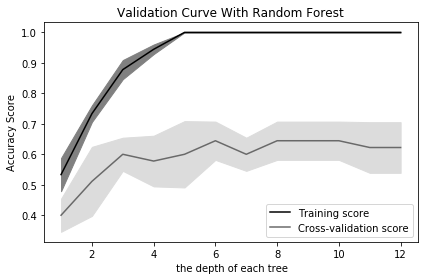

In [4]:
param_range=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]# 150, 200, 250, 300, 350, 400]
#param_range=np.linspace(1, 1000, 1, endpoint=True)

train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = y_train, param_name = 'max_depth', param_range = param_range, cv = 3, scoring="accuracy", n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel(" the depth of each tree")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


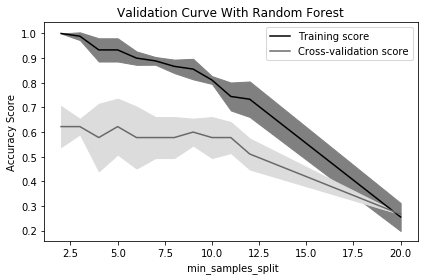

In [8]:
param_range=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20]
#param_range=np.linspace(1, 1000, 1, endpoint=True)

train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = y_train, param_name = 'min_samples_split', param_range = param_range, cv = 3, scoring="accuracy", n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel(" min_samples_split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


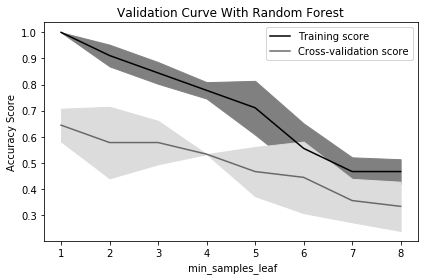

In [10]:
param_range=[1, 2, 3, 4, 5, 6, 7, 8]
#param_range=np.linspace(1, 1000, 1, endpoint=True)

train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = y_train, param_name = 'min_samples_leaf', param_range = param_range, cv = 3, scoring="accuracy", n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel(" min_samples_leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


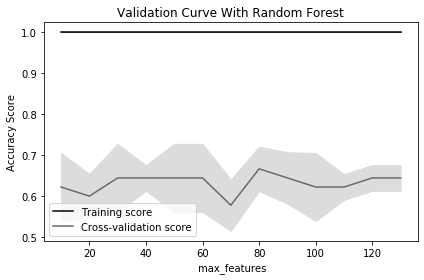

In [19]:
#max_features = list(range(1,df.shape[1]))
#param_range=[0.010, 0.020, 0.030, 0.040, 0.050, 0.060, 0.070, 0.080, 0.090, 0.100, 0.110, 0.120, 0.130]
param_range=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
#param_range=np.linspace(1, 1000, 1, endpoint=True)

train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = y_train, param_name = 'max_features', param_range = param_range, cv = 3, scoring="accuracy", n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel(" max_features")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


In [21]:
model = RandomForestClassifier()
from pprint import pprint

np.random.seed(3)

print('Parameters in use:\n')
pprint(model.get_params())

param_dist = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'max_features': ['auto', None],
    'min_samples_leaf': [ 1, 2, 3, 4],
    'min_samples_split': [1, 2, 3, 4],
    'n_estimators': [1, 10, 11, 20, 100],
    'n_jobs': [-1],
    'oob_score': [True],
    'verbose': [1]
}

from sklearn.model_selection import StratifiedKFold, GridSearchCV
skf = StratifiedKFold(n_splits=3, shuffle = True)
#clf = GridSearchCV(estimator=XGBClassifier(), param_grid=param_dist, scoring='accuracy', n_jobs=-1, pre_dispatch= None, cv=cv.split(X_train,y_train), refit=True)
clf = GridSearchCV(RandomForestClassifier(), param_dist, n_jobs=-1, cv=skf.split(X_train,y_train), refit=True)


clf.fit(X_train, y_train)

print("Best estimator is: {}".format(clf.best_estimator_))
print("Best parameters are: {}".format(clf.best_params_))
print("Best score is: {}".format(clf.best_score_))

pred = clf.best_estimator_.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test, pred))

Parameters in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.0s finished


Best estimator is: RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=20,
                       n_jobs=-1, oob_score=True, verbose=1)
Best parameters are: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': True, 'verbose': 1}
Best score is: 0.6666666666666666
0.8
              precision    recall  f1-score   support

  Cryptowall       0.50      1.00      0.67         1
  Megacortex       1.00      1.00      1.00         1
        Ryuk       0.50      1.00      0.67         1
      Samsam       1.00      1.00      1.00         1
     bitcoin       1.00      1.00      1.00         1
      cerber       1.00      0.50      0.67         2
 cryptojoker       1.00      1.00      1.00         1
      crysis       1.00      0.33      0.50         3
      dharma       0.50      1.00      0.67         1
       locky       1.00      1.00      1.00         1
        raas       1.00      1.00    

In [1]:
Best estimator is: RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       oob_score=True, verbose=1)
Best parameters are: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': True, 'verbose': 1}
Best score is: 0.6444444444444445
0.8666666666666667


Best estimator is: RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=20,
                       n_jobs=-1, oob_score=True, verbose=1)
Best parameters are: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': True, 'verbose': 1}
Best score is: 0.6666666666666666
0.8

SyntaxError: invalid syntax (<ipython-input-1-2849fe4810d7>, line 1)

In [3]:
model = RandomForestClassifier()
from pprint import pprint

np.random.seed(3)

print('Parameters in use:\n')
pprint(model.get_params())

param_dist = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'max_features': ['auto', None],
    'min_samples_leaf': [ 1, 2, 3, 4],
    'min_samples_split': [1, 2, 3, 4],
    'n_estimators': [100, 200, 350, 450, 500],
    'n_jobs': [-1],
    'oob_score': [True],
    'verbose': [1]
}
from sklearn.model_selection import StratifiedKFold, GridSearchCV
skf = StratifiedKFold(n_splits=3, shuffle = True)
#clf = GridSearchCV(estimator=XGBClassifier(), param_grid=param_dist, scoring='accuracy', n_jobs=-1, pre_dispatch= None, cv=cv.split(X_train,y_train), refit=True)
clf = GridSearchCV(RandomForestClassifier(), param_dist, n_jobs=-1, cv=skf.split(X_train,y_train), refit=True)


clf.fit(X_train, y_train)

print("Best estimator is: {}".format(clf.best_estimator_))
print("Best parameters are: {}".format(clf.best_params_))
print("Best score is: {}".format(clf.best_score_))

pred = clf.best_estimator_.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test, pred))

Parameters in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    0.8s finished


Best estimator is: RandomForestClassifier(max_depth=6, n_estimators=350, n_jobs=-1, oob_score=True,
                       verbose=1)
Best parameters are: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350, 'n_jobs': -1, 'oob_score': True, 'verbose': 1}
Best score is: 0.6444444444444445
0.8666666666666667
              precision    recall  f1-score   support

  Cryptowall       1.00      1.00      1.00         1
  Megacortex       1.00      1.00      1.00         1
        Ryuk       0.50      1.00      0.67         1
      Samsam       0.50      1.00      0.67         1
     bitcoin       1.00      1.00      1.00         1
      cerber       1.00      0.50      0.67         2
 cryptojoker       0.00      0.00      0.00         1
      crysis       1.00      1.00      1.00         3
      dharma       1.00      1.00      1.00         1
       locky       1.00      1.00      1.00         1
        raas       1.00      1.00      1.

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 350 out of 350 | elapsed:    0.1s finished
/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
Best estimator is: RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       oob_score=True, verbose=1)
Best parameters are: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': True, 'verbose': 1}
Best score is: 0.6444444444444445
0.8666666666666667


Best estimator is: RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=20,
                       n_jobs=-1, oob_score=True, verbose=1)
Best parameters are: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 20, 'n_jobs': -1, 'oob_score': True, 'verbose': 1}
Best score is: 0.6666666666666666
0.8



Best estimator is: RandomForestClassifier(max_depth=6, n_estimators=350, n_jobs=-1, oob_score=True,
                       verbose=1)
Best parameters are: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350, 'n_jobs': -1, 'oob_score': True, 'verbose': 1}
Best score is: 0.6444444444444445
0.8666666666666667


Best estimator is: RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=350,
                       n_jobs=-1, oob_score=True, verbose=1)
Best parameters are: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 350, 'n_jobs': -1, 'oob_score': True, 'verbose': 1}
Best score is: 0.7111111111111111
0.8666666666666667

SyntaxError: invalid syntax (<ipython-input-4-10db3a18ddee>, line 1)

In [6]:
print('Parameters in use:\n')
pprint(model.get_params())

param_dist = {
    'max_depth': [ 6, 7, 8, 10],
    'max_features': ['auto'],
    'min_samples_leaf': [ 1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [20, 100, 200, 350],
    'n_jobs': [-1],
    'oob_score': [True],
    'verbose': [1]
}

from sklearn.model_selection import StratifiedKFold, GridSearchCV
skf = StratifiedKFold(n_splits=3, shuffle = True)
#clf = GridSearchCV(estimator=XGBClassifier(), param_grid=param_dist, scoring='accuracy', n_jobs=-1, pre_dispatch= None, cv=cv.split(X_train,y_train), refit=True)
clf = GridSearchCV(RandomForestClassifier(), param_dist, n_jobs=-1, cv=skf.split(X_train,y_train), refit=True)


clf.fit(X_train, y_train)

print("Best estimator is: {}".format(clf.best_estimator_))
print("Best parameters are: {}".format(clf.best_params_))
print("Best score is: {}".format(clf.best_score_))

pred = clf.best_estimator_.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test, pred))

Parameters in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    0.8s finished


Best estimator is: RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=350,
                       n_jobs=-1, oob_score=True, verbose=1)
Best parameters are: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 350, 'n_jobs': -1, 'oob_score': True, 'verbose': 1}
Best score is: 0.7111111111111111


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 350 out of 350 | elapsed:    0.1s finished


0.8666666666666667
              precision    recall  f1-score   support

  Cryptowall       1.00      1.00      1.00         1
  Megacortex       1.00      1.00      1.00         1
        Ryuk       0.50      1.00      0.67         1
      Samsam       0.50      1.00      0.67         1
     bitcoin       1.00      1.00      1.00         1
      cerber       1.00      0.50      0.67         2
 cryptojoker       0.00      0.00      0.00         1
      crysis       1.00      1.00      1.00         3
      dharma       1.00      1.00      1.00         1
       locky       1.00      1.00      1.00         1
        raas       1.00      1.00      1.00         1
  sodinokibi       1.00      1.00      1.00         1

    accuracy                           0.87        15
   macro avg       0.83      0.88      0.83        15
weighted avg       0.87      0.87      0.84        15



/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
